In [23]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Data cleaning & preprocessing

### Import libraries

In [25]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt

#supress warnings related to libraries
import warnings
warnings.filterwarnings("ignore")

### Read the Data from CSV file in Visual Studio Code (VSC)

In [26]:
df =pd.read_csv("/workspaces/SDS-009-ds-salary-pred/data/salaries.csv", skipinitialspace=True)
#General structure of DS
df.info()
#check if there are any null or missing values
print(df.isna().sum())
# %% of DS
#print(df.isna().sum()/len(df)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB
Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64


### Drop duplicates

In [27]:
df = df.drop_duplicates()

### Strip before and after Whitespaces from entire data frame records

In [28]:
#Remove leading and following spaces in data
# #strip to all rows
df =df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

#strip to all columns
df.columns = df.columns.str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


### Restore Location for NaN values
This based on assumption that we already have the company in dataset and it have the same address. 

In [29]:
df['Location'] =  df.groupby('Company')['Location'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [30]:
#here we group by 'Company' then apply function
df['Location'] =  df.groupby('Company')['Location'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df = df.dropna(subset=['Location'])

df.info()

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 867
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        860 non-null    object 
 1   Company Score  782 non-null    float64
 2   Job Title      860 non-null    object 
 3   Location       860 non-null    object 
 4   Date           860 non-null    object 
 5   Salary         757 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
Company            0
Company Score     78
Job Title          0
Location           0
Date               0
Salary           103
dtype: int64


### Unfold Salary column

In [31]:
df['MIN'] = df['Salary'].str.extract('(\d{1,4})')
df['MAX'] = df['Salary'].str.extract('(.-.\$\d{1,4}K)')
df['MAX'] = df['MAX'].str.extract('(\d{1,4})')
df['Hourly'] = df['Salary'].str.extract('(Per Hour)')
df['Source'] = df['Salary'].str.extract('(\([a-zA-Z]+)')
df['Source'] = df['Source'].str.extract('([a-zA-Z]+)')
df['MIN'] = df['MIN'].astype(float)
df['MAX'] = df['MAX'].astype(float)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
86,ILOGIC INC,3.5,SOFTWARE DEVELOPERS,Township of Hamilton,30d+,$80.00 Per Hour (Employer est.),80.0,NaN,Per Hour,Employer
670,CDK Global,3.7,Principal Software Engineer,"Seattle, WA",30d+,$78K - $102K (Glassdoor est.),78.0,102.0,NaN,Glassdoor
409,Amazon.com Services LLC,5.0,Sr. Front End Engineer (React),"Charlotte, NC",2d,$65K - $107K (Glassdoor est.),65.0,107.0,NaN,Glassdoor
10,Salesforce,4.1,MTS Software Engineer,"San Francisco, CA",5d,$90K - $113K (Employer est.),90.0,113.0,NaN,Employer
131,NCR,3.1,Software Dev Ops Engineer II,Indiana,3d,$69K - $143K (Employer est.),69.0,143.0,NaN,Employer
...,...,...,...,...,...,...,...,...,...,...
189,Decision Six,3.6,Software Engineer,United States,5d,$124K - $211K (Employer est.),124.0,211.0,NaN,Employer
308,BNY Mellon,4.0,Build Engineer,California,4d,$85K - $115K (Employer est.),85.0,115.0,NaN,Employer
123,MedImpact Healthcare Systems,3.5,Software Engineer IV,"San Diego, CA",30d+,$83K - $131K (Glassdoor est.),83.0,131.0,NaN,Glassdoor
71,S3,3.8,Software Engineer- 826245,"Stennis Space Center, MS",20d,$56K - $88K (Glassdoor est.),56.0,88.0,NaN,Glassdoor


### Drop NaN Salaries
Not all the data can be restored based on assumptions, so here we drop these NaN lines

In [32]:
df = df[df['MIN'].notna()]
df['MAX'].fillna(df['MIN'],inplace=True)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
171,"Benistar Administrative Services, Inc.",3.9,AWS Cloud Engineer,"Avon, CT",2d,$86K - $131K (Glassdoor est.),86.0,131.0,NaN,Glassdoor
15,Amex,4.1,Java Engineer,"Plantation, FL",6d,$100K - $125K (Employer est.),100.0,125.0,NaN,Employer
384,"Garmin International, Inc.",3.7,Experienced Software Engineer - Scaled Access,"New York, NY",30d+,$70K - $96K (Glassdoor est.),70.0,96.0,NaN,Glassdoor
223,Clearwater Analytics,4.7,Software Development Engineer,"San Jose, CA",30d+,$81K - $113K (Glassdoor est.),81.0,113.0,NaN,Glassdoor
726,Bank of America,3.5,Software Engineer (All Levels),"McLean, VA",30d+,$75K - $131K (Employer est.),75.0,131.0,NaN,Employer
...,...,...,...,...,...,...,...,...,...,...
683,Zoox,3.7,Eaton Development Program: Engineering Technol...,"Peachtree City, GA",5d,$72K - $127K (Glassdoor est.),72.0,127.0,NaN,Glassdoor
131,NCR,3.1,Software Dev Ops Engineer II,Indiana,3d,$69K - $143K (Employer est.),69.0,143.0,NaN,Employer
709,Boeing,3.5,Software Engineer II,"New York, NY",18d,$81K - $131K (Glassdoor est.),81.0,131.0,NaN,Glassdoor
458,Grand Canyon Education,4.0,2025 BNY Summer Internship Program - Engineeri...,"Pittsburgh, PA",6d,$185K - $206K (Employer est.),185.0,206.0,NaN,Employer


### Mark Per hour salaries

In [33]:
df['Hourly']=df['Hourly'].fillna(0)
df['Hourly']=df['Hourly'].replace(["Per Hour"],1)
df.sample(100)

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),68.0,94.0,0,Glassdoor
302,CVS Health,4.2,Software Engineer II,"Wilmington, DE",30d+,$76K - $128K (Employer est.),76.0,128.0,0,Employer
612,Corteva,3.9,Software Engineer- Backend,"Fremont, CA",19d,$122K - $184K (Employer est.),122.0,184.0,0,Employer
689,Galvion,4.0,Senior Software Engineer,"Boston, MA",9d,$138K - $192K (Glassdoor est.),138.0,192.0,0,Glassdoor
283,Raytheon,4.0,Software Engineer,"Cambridge, MA",2d,$79K - $168K (Employer est.),79.0,168.0,0,Employer
...,...,...,...,...,...,...,...,...,...,...
624,Qualtrics,3.0,Software Engineer,"Lenexa, KS",15d,$129K - $224K (Employer est.),129.0,224.0,0,Employer
497,"Clarity Innovations, LLC",3.4,"Software Engineer, Mobile (React Native)","Denver, CO",13d,$80K - $110K (Employer est.),80.0,110.0,0,Employer
651,Embecta,3.3,Senior Software Engineer,"Boulder, CO",6d,$40.00 - $45.00 Per Hour (Employer est.),40.0,40.0,1,Employer
611,Accenture Federal Services,4.0,Site Reliability Engineer,United States,6d,$108K - $216K (Employer est.),108.0,216.0,0,Employer


### Turn hourly to annual
For the consistancy hourly rates will be turned to annual salaries. MIN and MAX will be similar. 

In [34]:
df[df['Hourly'] == 1].head()

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
86,ILOGIC INC,3.5,SOFTWARE DEVELOPERS,Township of Hamilton,30d+,$80.00 Per Hour (Employer est.),80.0,80.0,1,Employer
115,Two Six Technologies,4.1,Software Engineer,"Warrenton, VA",17d,$50.00 Per Hour (Employer est.),50.0,50.0,1,Employer
161,Mailprotector,4.6,Software Engineer,Remote,2d,$50.00 Per Hour (Employer est.),50.0,50.0,1,Employer
212,Salesforce,3.1,Software Engineering MTS,"San Francisco, CA",3d,$40.00 - $55.00 Per Hour (Employer est.),40.0,40.0,1,Employer
263,"PeopleTec, Inc.",3.5,Software Engineer- Executions Team,"Chicago, IL",20d,$80.00 - $85.00 Per Hour (Employer est.),80.0,80.0,1,Employer


In [35]:
#40 hours per week 52 weeks = 2080/1000 -> 2.08K

df['MIN'] = df.apply(lambda row: row['MIN'] * 2.080 if row['Hourly'] == 1 else row['MIN'], axis=1)
df['MAX'] = df['MIN']

df[df['Hourly'] == 1].head()

,Company,Company Score,Job Title,Location,Date,Salary,MIN,MAX,Hourly,Source
86,ILOGIC INC,3.5,SOFTWARE DEVELOPERS,Township of Hamilton,30d+,$80.00 Per Hour (Employer est.),166.4,166.4,1,Employer
115,Two Six Technologies,4.1,Software Engineer,"Warrenton, VA",17d,$50.00 Per Hour (Employer est.),104.0,104.0,1,Employer
161,Mailprotector,4.6,Software Engineer,Remote,2d,$50.00 Per Hour (Employer est.),104.0,104.0,1,Employer
212,Salesforce,3.1,Software Engineering MTS,"San Francisco, CA",3d,$40.00 - $55.00 Per Hour (Employer est.),83.2,83.2,1,Employer
263,"PeopleTec, Inc.",3.5,Software Engineer- Executions Team,"Chicago, IL",20d,$80.00 - $85.00 Per Hour (Employer est.),166.4,166.4,1,Employer


### Check the Data Set after cleaning

In [36]:
df['Company'] = df['Company'].astype(str)
df['MIN'] = df['MIN'].astype(float)
df['MAX'] = df['MAX'].astype(float)
df['Hourly'] = df['Hourly'].astype(int)
df['Source'] = df['Source'].astype(str)

print(df.dtypes)

print(df.isna().sum())

Company           object
Company Score    float64
Job Title         object
Location          object
Date              object
Salary            object
MIN              float64
MAX              float64
Hourly             int64
Source            object
dtype: object
Company          0
Company Score    0
Job Title        0
Location         0
Date             0
Salary           0
MIN              0
MAX              0
Hourly           0
Source           0
dtype: int64


### Job roles classification
Here the list of jobs will be folded to shorter list based on some similarities in the description

In [37]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def categorize_job_title(title):
    title = title.lower()  # Convert to lowercase for consistency
    if 'backend' in title or 'frontend' in title or 'software engineer' in title:
        return 'Software Engineer'
    elif 'developer' in title or 'development' in title:
        return 'Developer'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'machine learning' in title or 'ai' in title or 'ml' in title:
        return 'Machine Learning/AI Engineer'
    elif 'devops' in title:
        return 'DevOps Engineer'
    elif 'full stack' in title:
        return 'Full Stack Developer'
    elif 'test' in title or 'quality' in title: 
        return 'QA Engineer'
    else:
        return 'Other IT Jobs'
    

df['Job Category'] = df['Job Title'].apply(categorize_job_title)

print(df)



                           Company  Company Score  \
0                         ViewSoft            4.8   
1                          Workiva            4.3   
2       Garmin International, Inc.            3.9   
3                         Snapchat            3.5   
4    Vitesco Technologies Group AG            3.1   
..                             ...            ...   
759                         OpenAI            3.1   
760                     NCR Atleos            3.9   
761  Electronic Warfare Associates            3.8   
762                   BillGO, Inc.            3.3   
763                        Genesys            3.6   

                                             Job Title           Location  \
0                                    Software Engineer       Manassas, VA   
1                            Software Support Engineer             Remote   
2                                 C# Software Engineer           Cary, NC   
3    Software Engineer, Fullstack, 1+ Years of Expe... 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Other IT Jobs'),
  Text(2, 0, 'Developer'),
  Text(3, 0, 'QA Engineer'),
  Text(4, 0, 'DevOps Engineer'),
  Text(5, 0, 'Machine Learning/AI Engineer'),
  Text(6, 0, 'Full Stack Developer')])

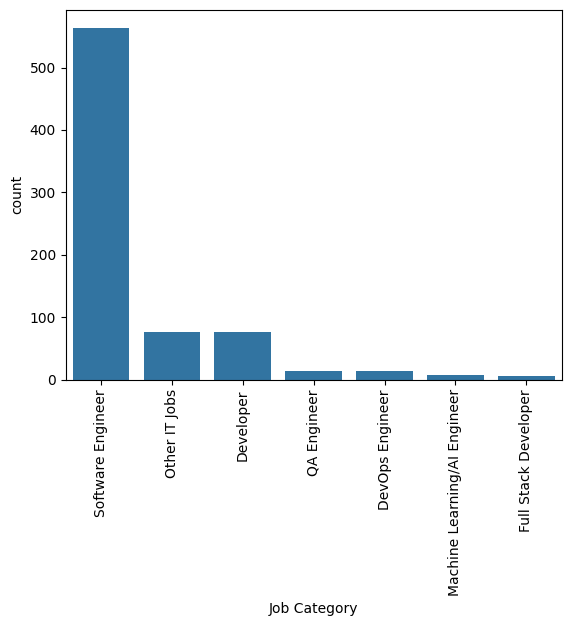

In [40]:
sns.countplot(x='Job Category', data=df)
plt.xticks(rotation = 90)

### Factorize string values
Models understood numbers only. For the application purposes we need to store unique values and their factorized values

In [41]:
df['Company'] = df['Company'].str.replace('"', '')
df['Company_Code'] = pd.factorize(df['Company'])[0]
company_unique_mapping = df[['Company_Code', 'Company']].drop_duplicates()
company_unique_mapping.to_csv('companies.csv', index=False)

df['Location'] = df['Location'].str.replace('"', '')
df['Location_Code'] = pd.factorize(df['Location'])[0]
company_unique_mapping = df[['Location_Code', 'Location']].drop_duplicates()
company_unique_mapping.to_csv('locations.csv', index=False)

df['Job Category'] = df['Job Category'].str.replace('"', '')
df['Job_Code'] = pd.factorize(df['Job Category'])[0]
company_unique_mapping = df[['Job_Code', 'Job Category']].drop_duplicates()
company_unique_mapping.to_csv('jobs.csv', index=False)


### Drop odd columns

In [42]:
df = df.drop(['Job Title'], axis =1)
df = df.drop(['Date'], axis =1)
df = df.drop(['Salary'], axis =1)
df = df.drop(['Company'], axis =1)
df = df.drop(['Location'], axis =1)
df = df.drop(['Source'], axis =1)
df = df.drop(['Job Category'], axis =1)
df = df.drop(['Hourly'], axis =1)

### Add average salary AVG
To simplify I'm going to use Average salary value.

In [43]:
df['AVG'] = df[['MIN', 'MAX']].mean(axis=1)


## 2. Features selection
A good how-to can be found here:  https://youtu.be/hCwTDTdYirg?si=gykASdD21iaigCOb

### Classic Train/test split routine...

In [44]:
#import Libraries
from sklearn.model_selection import train_test_split

X = df.drop(['MIN'], axis =1)
X = X.drop(['MAX'], axis =1)
X = X.drop(['AVG'], axis =1)

y = df['AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)


print(X_train.shape)
print(X_test.shape)


(529, 4)
(228, 4)


### Define Baseline Model: Gradient Boosting Classifier with all features

In [45]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Label encoding
lab_enc = preprocessing.LabelEncoder()
encoded_y_train = lab_enc.fit_transform(y_train)
encoded_y_test = lab_enc.fit_transform(y_test)

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train classifier using all features
gbc.fit(X_train, encoded_y_train)

# Make predictions
preds = gbc.predict(X_test)

# Evaluate the model using the F1-score
f1_score_all = round(f1_score(encoded_y_test, preds, average='weighted'), 3)

print(f1_score_all)

0.009


### Variance threshold

In [46]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

#Check for variance for each feature

X_train_v1.var(axis=0)

Company Score        0.263198
Company_Code     28001.497186
Location_Code     7430.018238
Job_Code             1.230030
dtype: float64

### Values Scaling

In [47]:
#Without scaling the values above makes no sense. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

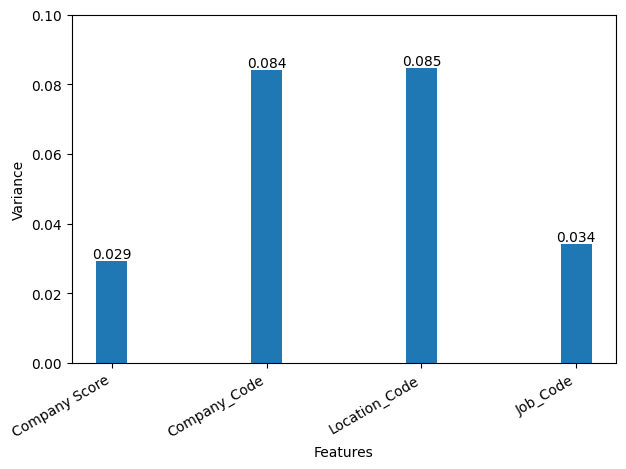

In [48]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.1)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

In [49]:
#I set the trashold of 0.03. So that the Company Score should be dropped. 

sel_X_train_v1 = X_train_v1.drop(['Company Score'], axis=1)
sel_X_test_v1 = X_test_v1.drop(['Company Score'], axis=1)

gbc.fit(sel_X_train_v1, encoded_y_train)

var_preds = gbc.predict(sel_X_test_v1)

# encoding
encoded_y_test_v1 = lab_enc.fit_transform(y_test_v1)

f1_score_var = round(f1_score(encoded_y_test_v1, var_preds, average='weighted'), 3)

print(f1_score_var)

0.013


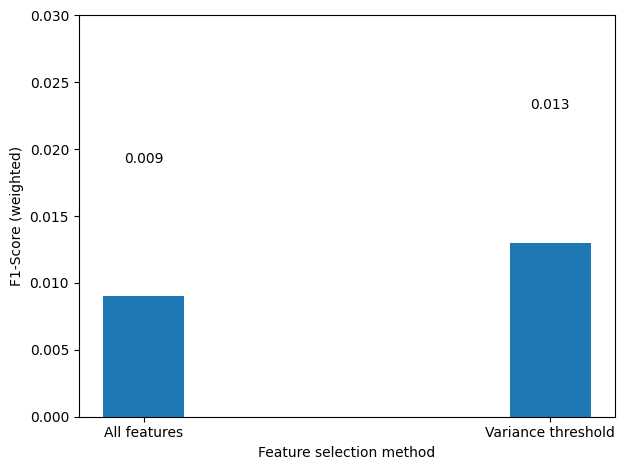

In [50]:
#plot it

fig, ax = plt.subplots()

x = ['All features', 'Variance threshold']
y = [f1_score_all, f1_score_var]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.03)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01, s=str(round(value,3)), ha='center')
    
plt.tight_layout()

### K-best features

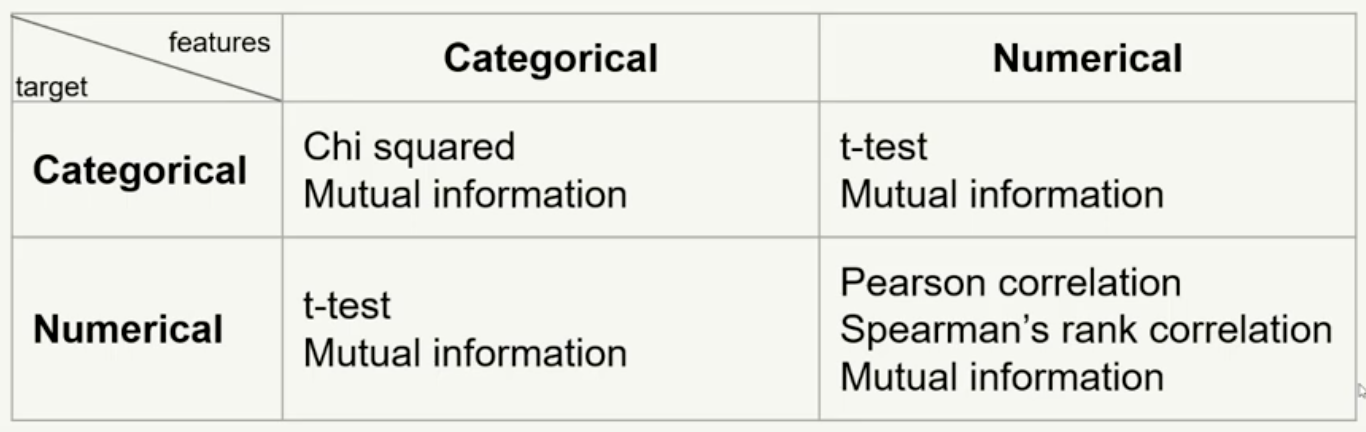

Works good for smal data sets only :(

In [51]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

#encoding
encoded_y_train_v2 = lab_enc.fit_transform(y_train_v2)
encoded_y_test_v2 = lab_enc.fit_transform(y_test_v2)


for k in range(1, 5):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, encoded_y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    gbc.fit(sel_X_train_v2, encoded_y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)
    
    f1_score_kbest = round(f1_score(encoded_y_test_v2, kbest_preds, average='weighted'), 3)
    
    f1_score_list.append(f1_score_kbest)

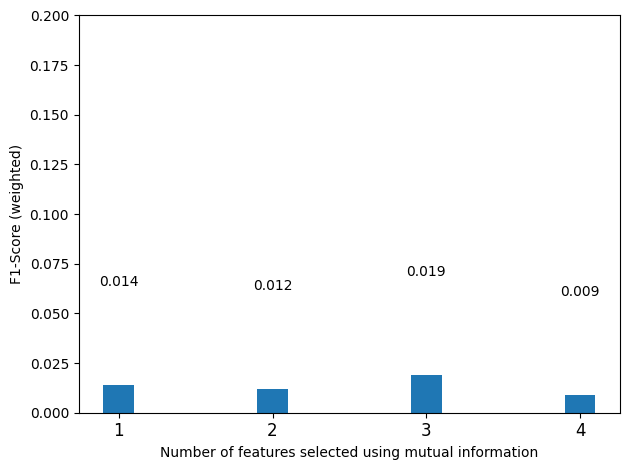

In [53]:
fig, ax = plt.subplots()

x = np.arange(1, 5)
y = f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.2)
ax.set_xticks(np.arange(1, 5))
ax.set_xticklabels(np.arange(1, 5), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [54]:
selector = SelectKBest(mutual_info_classif, k=3)
selector.fit(X_train_v2, encoded_y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['Company Score', 'Location_Code', 'Job_Code'], dtype='object')

### RFE - Recursive feature elimination 

In [55]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [56]:
from sklearn.feature_selection import RFE

rfe_f1_score_list = []

encoded_y_train_v3 = lab_enc.fit_transform(y_train_v3)
encoded_y_test_v3 = lab_enc.fit_transform(y_test_v3)


for k in range(1, 5):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, encoded_y_train_v3)
    
    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)
    
    gbc.fit(sel_X_train_v3, encoded_y_train_v3)
    RFE_preds = gbc.predict(sel_X_test_v3)
    
    f1_score_rfe = round(f1_score(encoded_y_test_v3, RFE_preds, average='weighted'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)

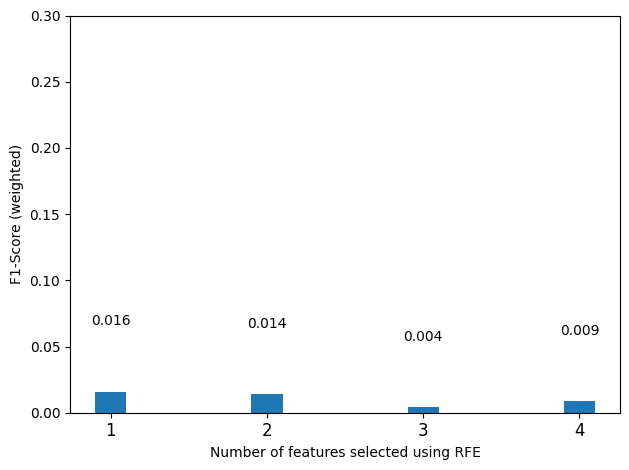

In [57]:
fig, ax = plt.subplots()

x = np.arange(1, 5)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.3)
ax.set_xticks(np.arange(1, 5))
ax.set_xticklabels(np.arange(1, 5), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [58]:
RFE_selector = RFE(estimator=gbc, n_features_to_select=3, step=1)
RFE_selector.fit(X_train_v3, encoded_y_train_v3)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['Company Score', 'Company_Code', 'Location_Code'], dtype='object')

### Boruta

To install Boruta

In [59]:
# $ pip install Boruta

In [60]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [61]:
from boruta import BorutaPy

from sklearn.ensemble import RandomForestRegressor
# from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression

encoded_y_train_v4 = lab_enc.fit_transform(y_train_v4)
encoded_y_test_v4 = lab_enc.fit_transform(y_test_v4)

# LinearRegression
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)



# gbc
boruta_selector = BorutaPy(verbose=2,
                           estimator = model,
                           n_estimators = 'auto',
                           max_iter = 300,
                           random_state=79,
                           alpha=0.01)

# # boruta_selector.fit(X_train_v4.values, encoded_y_train_v4.values.ravel())

boruta_selector.fit(X_train_v4, encoded_y_train_v4)

# //
# sel_X_train_v4 = boruta_selector.transform(X_train_v4.values)
# sel_X_test_v4 = boruta_selector.transform(X_test_v4.values)

# gbc.fit(sel_X_train_v4, encoded_y_train_v4)

# boruta_preds = model.predict(sel_X_test_v4)

boruta_preds = model.predict(X_test_v4.values)

# boruta_f1_score = round(f1_score(encoded_y_test_v4, boruta_preds, average='weighted'), 3)

boruta_f1_score = round(f1_score(encoded_y_test_v4, boruta_preds, average='weighted'), 3)

ModuleNotFoundError: No module named 'boruta'

In [67]:
for i in range(len(boruta_selector.support_)):
    if boruta_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", boruta_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", boruta_selector.ranking_[i])

Doesn't pass the test:  Company Score  - Ranking:  3
Passes the test:  Company_Code  - Ranking:  1
Doesn't pass the test:  Location_Code  - Ranking:  2
Doesn't pass the test:  Job_Code  - Ranking:  4


In [71]:

sel_X_train_v4 = boruta_selector.transform(np.array(X_train_v4))
sel_X_test_v4 = boruta_selector.transform(np.array(X_test_v4))

gbc.fit(sel_X_train_v4, encoded_y_train_v4)

boruta_preds = gbc.predict(sel_X_test_v4)

boruta_f1_score = round(f1_score(encoded_y_test_v4, boruta_preds, average='weighted'), 3)

In [72]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_v4.columns[selected_features_mask]
selected_features


Index(['Company_Code'], dtype='object')

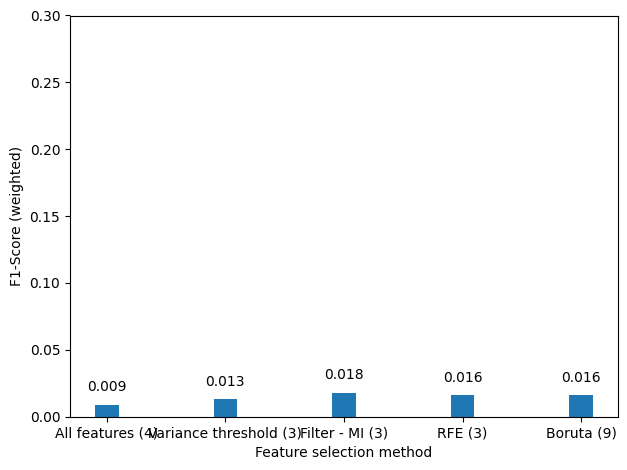

In [73]:
fig, ax = plt.subplots()

x = ['All features (4)', 'Variance threshold (3)', 'Filter - MI (3)', 'RFE (3)', 'Boruta (9)']
y = [f1_score_all, f1_score_var, 0.018, max(rfe_f1_score_list), boruta_f1_score]



ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 0.3)

for i, v in enumerate(y):
    plt.text(x=i, y=v+0.01, s=str(v), ha='center')
    
plt.tight_layout()

## Preparing models

### Define models

In [75]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 70.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 41.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
import joblib

ModuleNotFoundError: No module named 'sklearn'

In [4]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3),
    'Support Vector Regressor': SVR(kernel='linear'),  # SVR with linear kernel
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

NameError: name 'LinearRegression' is not defined

### Drop column


In [80]:
X_train = X_train.drop(['Company Score'], axis =1)
X_test = X_test.drop(['Company Score'], axis =1)

KeyError: "['Company Score'] not found in axis"

### Train Models

In [81]:
results = {}
predictions = {}
for model_name, model in models.items():
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    results[model_name] = -1 * np.mean(scores)  # Convert negative MAE to positive MAE
    



### Evaluate and save

In [82]:

performance = {}
for model_name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred  # Store predictions for later plotting
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    performance[model_name] = mae
    
    # Save the trained model
    joblib.dump(model, f'{model_name}_model.pkl')

### Plot models

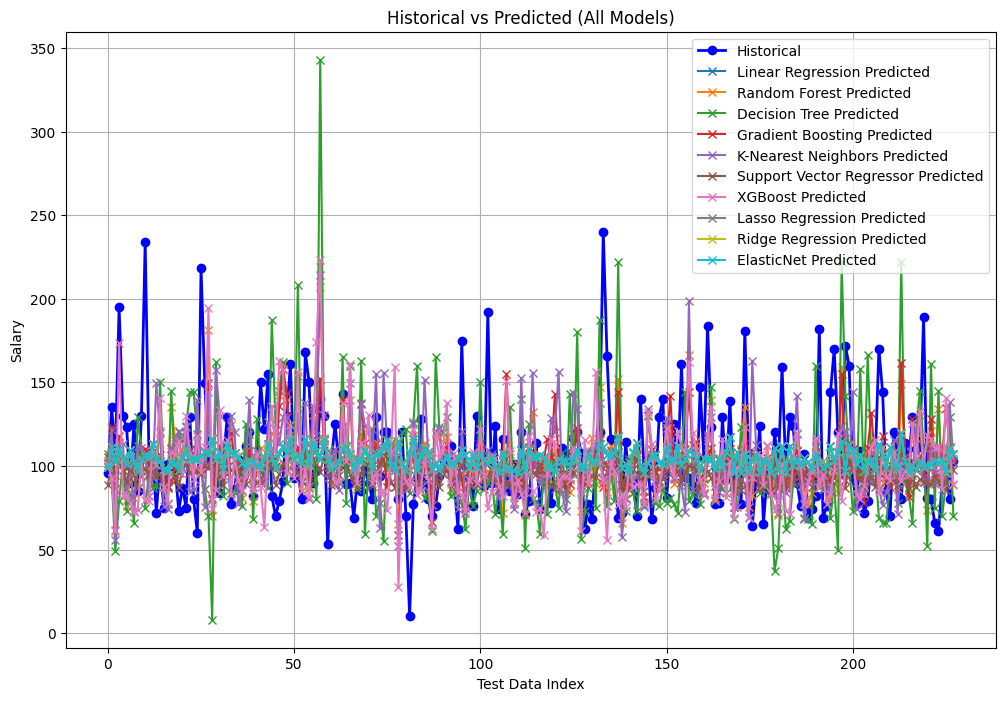

In [83]:
plt.figure(figsize=(12, 8))

# Plot historical values
plt.plot(np.arange(len(y_test)), y_test, label='Historical', color='blue', marker='o', linewidth=2)

# Plot predictions for each model
for model_name, y_pred in predictions.items():
    plt.plot(np.arange(len(y_pred)), y_pred, label=f'{model_name} Predicted', marker='x')

plt.title('Historical vs Predicted (All Models)')
plt.xlabel('Test Data Index')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

### Plot one by one

<Figure size 1200x800 with 0 Axes>

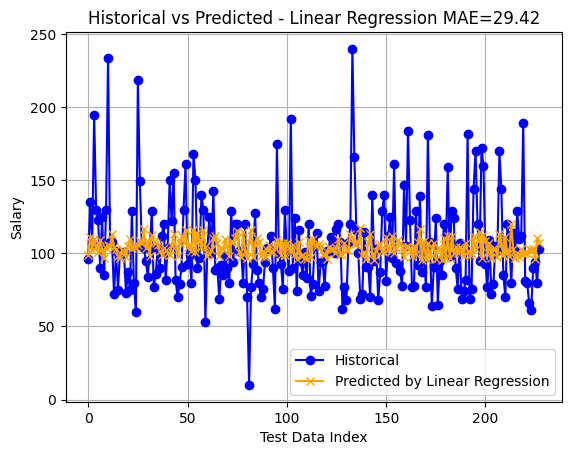

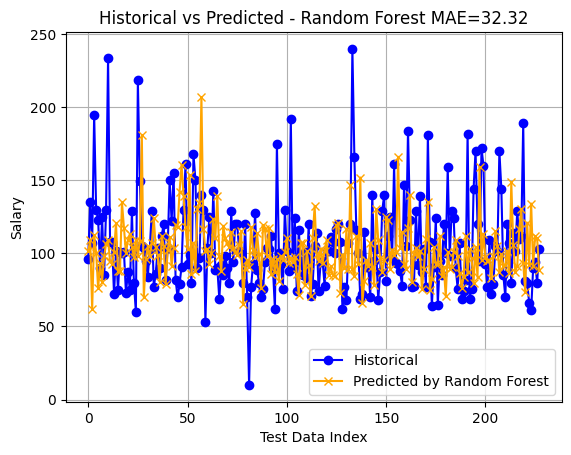

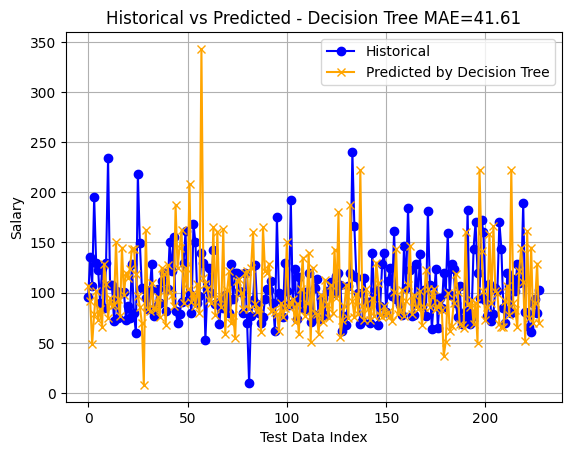

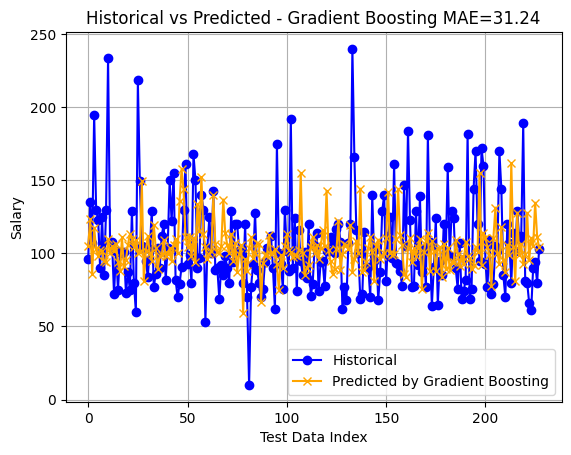

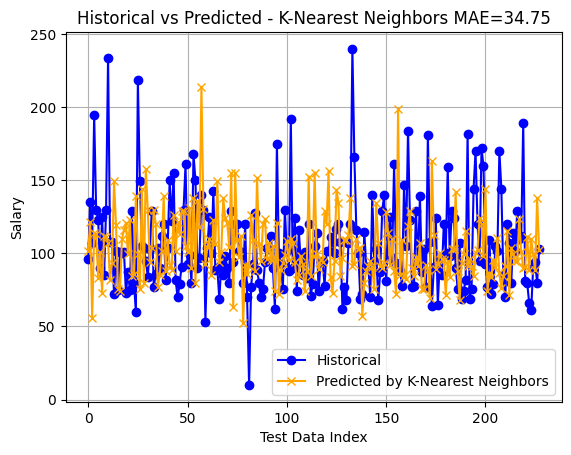

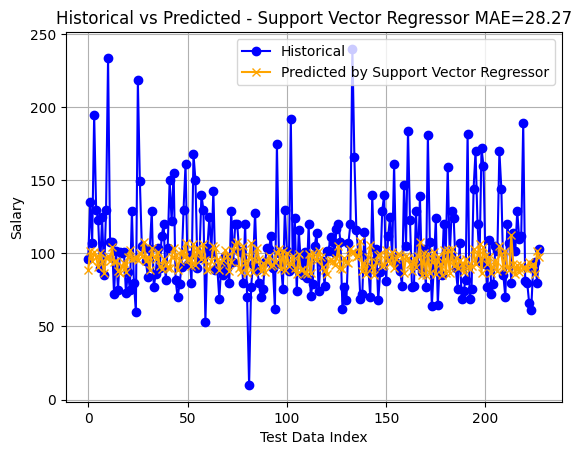

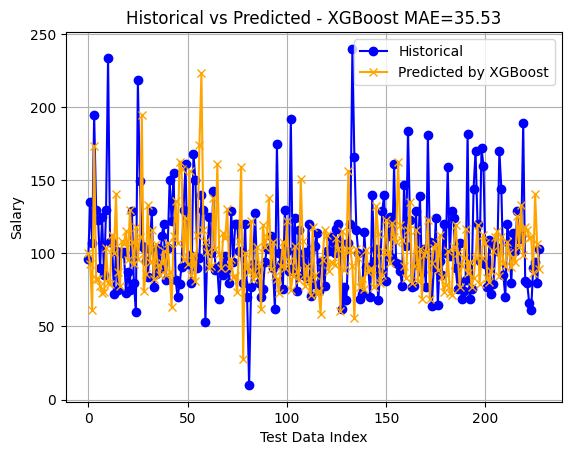

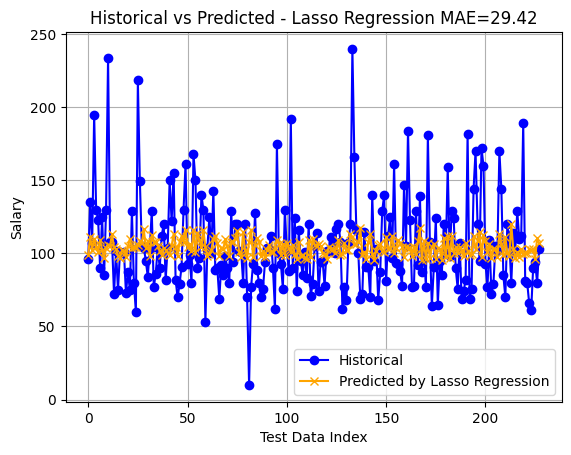

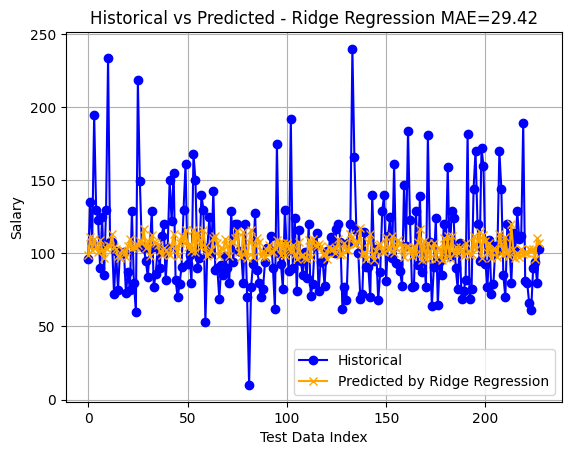

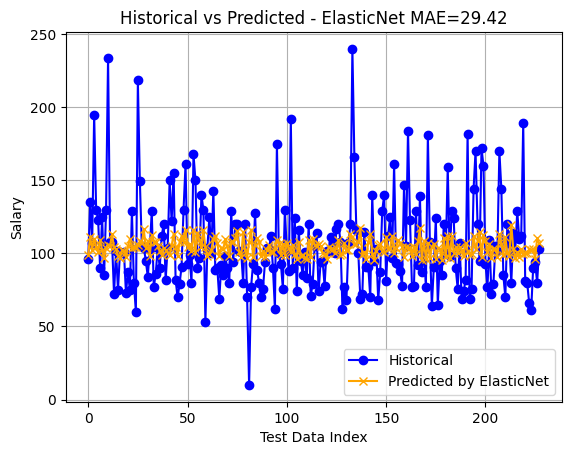

In [84]:
plt.figure(figsize=(12, 8))

# Plot for each model
for model_name, y_pred in predictions.items():
    formatted_mae = f'{results[model_name]:.2f}'
    plt.figure()
    plt.plot(np.arange(len(y_test)), y_test, label='Historical', color='blue', marker='o')
    plt.plot(np.arange(len(y_pred)), y_pred, label=f'Predicted by {model_name}', color='orange', marker='x')
    plt.title(f'Historical vs Predicted - {model_name} MAE={formatted_mae}')
    plt.xlabel('Test Data Index')
    plt.ylabel('Salary')
    plt.legend()
    plt.grid(True)
    plt.show()

In [71]:
def load_model():
    file_path = "Support_Vector_Regressor_model.pkl"
    try:
        loaded_model = joblib.load(file_path)
        print(type(loaded_model))
        return(loaded_model)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None   
    except IOError:
        print(f"Error: An error occurred while trying to read the file '{file_path}'.")
        return None 
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [72]:
def predict( company_value, location_value, job_value) -> float:
    model = load_model()
    print(type(loaded_model))
    input_df=pd.DataFrame([[company_value, location_value, job_value]], columns=['Company_Code', 'Location_Code', 'Job_Code'])
    avg_salary_predicted = model.predict(input_df)
    return avg_salary_predicted

In [75]:
 import joblib
 file_path = 'Support_Vector_Regressor_model.pkl'
 loaded_model = joblib.load(file_path)

 company_value = 11
 location_value = 9
 job_value = 1

 avg_salary_predicted = predict(company_value, location_value, job_value)
 print (type(avg_salary_predicted))
    
 print(avg_salary_predicted[0])

<class 'sklearn.svm._classes.SVR'>
<class 'sklearn.svm._classes.SVR'>
<class 'numpy.ndarray'>
87.84484423072966
